# Techcareer.net Veri Bilimi - Ödev 2
#### Hazırlayan: Furkan Kurşun

1. Bu ödevde gerçek IoT verisi üzerinde gözetimli öğrenme algoritmalarını test edeceksin. Amaç, verideki değişkenleri analiz ederek odada insan varlığını (occupancy) tespit etmek. 

2. Veriye ilişkin detaylı bilgi için **"Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models"** makalesini okuyabilirsiniz. 

3. Veri içerisindeki ilişkileri görselleştirme yöntemleri ile açıklayın.

4. Parametre listenize en az bir yeni nitelik ekleyin. İki veya daha fazla parametrenin kombinasyonu, birbiriyle çarpımı, toplamı, karesi vs. şeklinde olabilir.

5. Üç adet veri seti mevcut: **Veriseti1:** Kapılar kapalıyken alınmış ölçümler. **Veriseti2:** Kapılar kapalıyken alınmış başka bir veri seti. **Veriseti3:** Kapılar açıkken alınmış ölçümler.

6. Veriseti1 ve Veriseti2 kullanarak oluşturduğunuz modeli Veriseti3 için test edeceksiniz.  

7. Hedef parametreniz Occupancy. İnsan varlığı 1, insan yokluğu 0 değerlerine karşılık geliyor. 

8. Seçeceğiniz model için hyperparametre tuning yapın. Sonuçlarınızın başarısını doğruluk kriterleri ve confusion matrix ile gösterin.

9. Algoritmanızın başarısı **Veriseti3:** üzerindeki sonuçlar ile değerlendirilecektir. 

10. Aşamalarınızı ve yaklaşımlarınız açıklayan, kodunuzun anlaşılmasının kolay olacağı bir notebook hazırlayın. Konuyu bilmeyen bir insanın raporunuza bakarak tekrarlayabileceği şekilde oluşturun. 

# Table Of Contents

1. <a href='#1'> Importing Libraries and Dataset </a> <br>

2. <a href='#2'>Dataset </a> <br>
    2.1  <a href='#3'> Concatenating DataFrames </a>    
    2.2  <a href='#4'> Dataset Summary </a>   
    
3. <a href='#5'> Exploratory Data Analysis </a> <br>
     3.1 <a href='#6'> Occupancy </a> <br>
     3.2 <a href='#7'> Temperature </a> <br>
     3.3 <a href='#8'> Humidity </a> <br>
     3.4 <a href='#9'> Light </a> <br>
     3.5 <a href='#10'> CO2 </a> <br>
     3.6 <a href='#11'> Time Plot </a> <br>
     3.7 <a href='#12'> Describe </a> <br>
     3.8 <a href='#13'> Correlation Matrix </a> <br>
4. <a href='#14'> Model Random Forest </a> <br>     
5. <a href='#15'> Model Gradient Boosting </a> <br>     
6. <a href='#16'> Feature Engineering </a> <br>    
7. <a href='#17'> Random Forest  Model Tuning  </a> <br>    
8. <a href='#18'> Gradient Boosting  Model Tuning  </a> <br>    

## <a id='1'> 1. Importing Libraries </a>

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

 # <a id='2'> 2. Data Set</a>
 
 
 ![](https://i.kobivadisi.com/wp-content/uploads/bos-oda-kiralayarak-ek-gelir-elde-etmek.jpg.webp)
 
 
 
 This research has used data recorded from light, temperature,humidity and CO2 sensors as a means to detect occupancy and 
digital camera to establish ground occupancy for supervised classification model training.Three data sets have been used to train and testthe classification models.For all the data sets, the temperature, humidity,the derived humidity ratio, light, CO2, occupancy status (0 for non-occupied, 1 for occupied) and time stamp are defined. 

date = time <br> 
Temperature = Temperature  in the room <br>
Humidity = humidity in the room <br>
Light = Light in the room <br> 
CO2 = CO2  in the room <br> 
HumidityRatio =  HumidityRatio in the room <br> 

Occupancy  <br> 
* 1==> if there are people in the room   <br> 
* 0==> if there are not  people in the room <br> 

In [2]:
dataset_1= pd.read_csv('Veriseti1.txt')
df_1=dataset_1.copy()
df_1.head(5)

date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [4]:
dataset_2= pd.read_csv('Veriseti2.txt')
df_2=dataset_2.copy()
df_2.head(5)

date  Temperature  Humidity       Light         CO2  \
140  2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
141  2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
142  2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
143  2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
144  2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   

     HumidityRatio  Occupancy  
140       0.004764          1  
141       0.004773          1  
142       0.004765          1  
143       0.004744          1  
144       0.004767          1

In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


 ## <a id='3'> 2.1.Concatenating DataFrames  </a>

<div class="alert alert-block alert-warning">
<b></b>  We concanate dataset1  and dataset2. Result dataset will be our training dataset.
</div>

In [6]:
df=pd.concat([df_1,df_2])

In [7]:
df.head()

date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1

In [8]:
df.shape

(10808, 7)

* Dataset comprises of 10808 observations and 7 characteristics.
* Out of which one is dependent variable and rest 6 are independent variables

In [9]:
#  Columns Names
df.keys()

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10808 entries, 1 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10808 non-null  object 
 1   Temperature    10808 non-null  float64
 2   Humidity       10808 non-null  float64
 3   Light          10808 non-null  float64
 4   CO2            10808 non-null  float64
 5   HumidityRatio  10808 non-null  float64
 6   Occupancy      10808 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 675.5+ KB


In [11]:
df.isnull().values.any()

False

In [12]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

Total  Percent
date               0      0.0
Temperature        0      0.0
Humidity           0      0.0
Light              0      0.0
CO2                0      0.0
HumidityRatio      0      0.0
Occupancy          0      0.0

* Data has only float,object and integer values.
* Variable column has not null/missing values. 
    * What a lovely day :)

In [13]:
# Duplicated data
df[df.duplicated() == True]

Empty DataFrame
Columns: [date, Temperature, Humidity, Light, CO2, HumidityRatio, Occupancy]
Index: []

* We don't have duplicated data

 ## <a id='4'> 2.2. Dataset summary </a> <br>

* Dataset comprises of 10808 observations and 7 characteristics.
* Out of which one is dependent variable and rest 6 are independent variables.
* Data has only float,object and integer values.
* Variable column has not null/missing values. 
    * What a lovely day :)
*We don't have duplicated data.

 # <a id='5'> 3.Exploratory Data Analysis</a>
 
* Exploratory Data Analysis refers to the critical process of performing 
initial investigations on data so as to discover patterns,to spot anomalies, 
to test hypothesis and to check assumptions with
the help of summary statistics and graphical representations. <br>

* Your goal during EDA is to develop an understanding of your data. The easiest way to do this is to use questions as tools to guide your investigation. When you ask a question, the question focuses your attention on a specific part of your dataset and helps you decide which graphs, models, or transformations to make.<br>

* Generate questions about your data.<br>

* Search for answers by visualising, transforming, and modelling your data. <br>

* Use what you learn to refine your questions and/or generate new questions. <br>

* EDA is not a formal process with a strict set of rules.<br> 
* More than anything, EDA  is a state of mind.<br> 
* During the initial phases of EDA you should feel free to investigate every idea that occurs to you.<br> 
* Some of these ideas will pan out, and some will be dead ends.<br>
* As your exploration continues, you will home in on a few particularly productive areas that you’ll eventually write up and communicate to others.<br>

* Let's start exploring our data

## <a id='6'> 3.1. Occupancy</a>



In [14]:
# Grafik 1
df_Occupancy=df['Occupancy'].value_counts().reset_index().rename(columns={'index':'Occupancy','Occupancy':'Count'})
colors=['cyan','Tomato']

fig = go.Figure([go.Pie(labels=df_Occupancy['Occupancy'], values=df_Occupancy['Count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+value', textfont_size=15,
                 marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Occupancy Percentage  ",title_x=0.3)
fig.show()

In [15]:
# Grafik 2
df_Occupancy=df['Occupancy'].value_counts().reset_index().rename(columns={'index':'Occupancy','Occupancy':'Count'})

fig = go.Figure(go.Bar(
    x=df_Occupancy['Occupancy'],y=df_Occupancy['Count'],
    marker={'color': df_Occupancy['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Occupancy['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Occupancy Distribution',xaxis_title="Occupancy",yaxis_title="Count ",title_x=0.5)
fig.show()

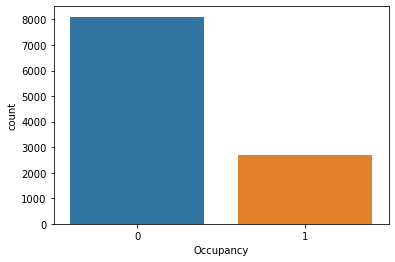

In [16]:
# Grafik 3
ax = sns.countplot(x="Occupancy", data=df);

* As you can see we have unbalanced dataset

## <a id='7'> 3.2. Temperature </a>

In [17]:
# 2 dataframe birleştiği için index sıfırladık yenı index verdik
df=df.reset_index()
df.drop(['index'],inplace=True,axis=1)

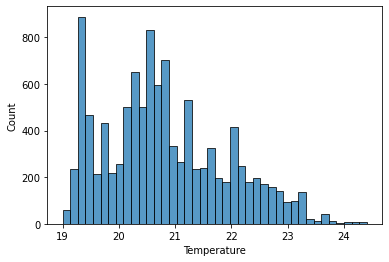

In [18]:
sns.histplot(data=df, x="Temperature");

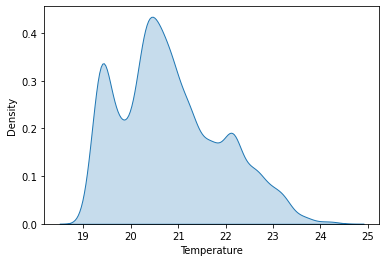

In [19]:
sns.kdeplot(data=df, x="Temperature",shade=True);

In [20]:
fig = px.box(df, y="Temperature")
fig.show()

In [21]:
fig = go.Figure(data=[go.Histogram(x=df['Temperature'],  # To get Horizontal plot ,change axis - 
                                  marker_color="Crimson",
                       xbins=dict(
                      start=0, #start range of bin
                      end=50,  #end range of bin
                      size=1   #size of bin
                      ))])
fig.update_layout(title="Distribution Of Temperature",xaxis_title="Temperature",yaxis_title="Counts",title_x=0.5,bargap=0.2)
fig.show()

In [22]:
def print_stats (frame,name):
    print(name +" Min Value : "+ str(frame.min())) # [np.size,np.mean,min, max,sum]
    print(name +" Max Value : "+ str(round(frame.max(),2)))
    print(name +" Mean Value : "+ str(round(frame.mean(),2)))
    print(name +" Mod Value : "+ str(frame.mode().iloc[0]))
    print(name +" Median Value : "+ str(frame.median()))
    

In [23]:
frame=df["Temperature"]
name="Temperature"
print_stats(frame,name)

Temperature Min Value : 19.0
Temperature Max Value : 24.41
Temperature Mean Value : 20.82
Temperature Mod Value : 19.39
Temperature Median Value : 20.7


## <a id='8'> 3.3. Humidity </a>

In [24]:
frame=df["Humidity"]
name="Humidity"
print_stats(frame,name)

Humidity Min Value : 16.745
Humidity Max Value : 39.12
Humidity Mean Value : 25.64
Humidity Mod Value : 33.0
Humidity Median Value : 25.68


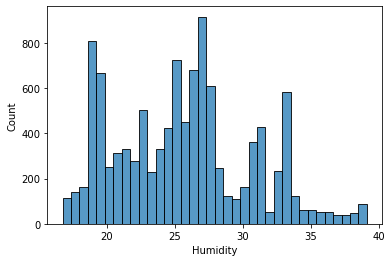

In [25]:
sns.histplot(data=df, x="Humidity");

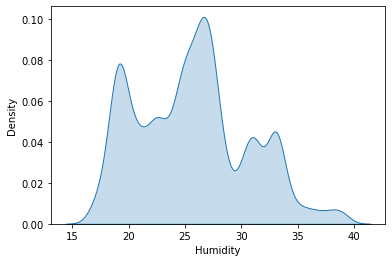

In [26]:
sns.kdeplot(data=df, x="Humidity",shade=True);

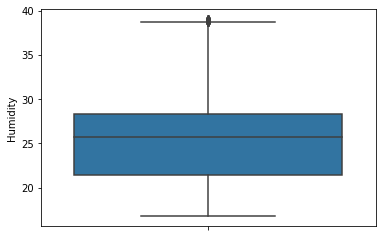

In [27]:
sns.boxplot(data=df, y="Humidity");

## <a id='9'> 3.4. Light </a>

In [28]:
frame=df["Light"]
name="Light"
print_stats(frame,name)

Light Min Value : 0.0
Light Max Value : 1697.25
Light Mean Value : 137.69
Light Mod Value : 0.0
Light Median Value : 0.0


<AxesSubplot:xlabel='Light', ylabel='Count'>

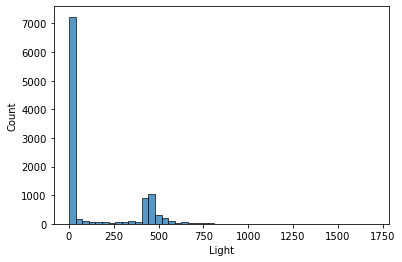

In [29]:
sns.histplot(data=df, x="Light")

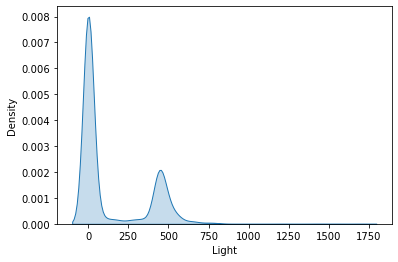

In [30]:
sns.kdeplot(data=df, x="Light",shade=True);

## <a id='10'> 3.5. CO2 </a>


<AxesSubplot:xlabel='CO2', ylabel='Count'>

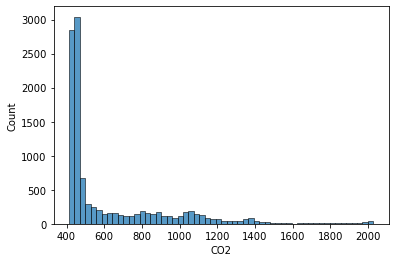

In [31]:
sns.histplot(data=df, x="CO2")

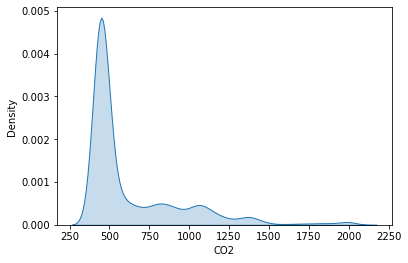

In [32]:
sns.kdeplot(data=df, x="CO2",shade=True);

In [33]:
frame=df["CO2"]
name="CO2"
print_stats(frame,name)

CO2 Min Value : 412.75
CO2 Max Value : 2028.5
CO2 Mean Value : 634.01
CO2 Mod Value : 439.0
CO2 Median Value : 464.0


 ## <a id='11'> 3.6. Time plot </a>

In [34]:
df['date'] = pd.to_datetime(df['date'])
df['Time']= df['date'].dt.strftime("%H")
df=df.sort_values("Time",ascending=True)

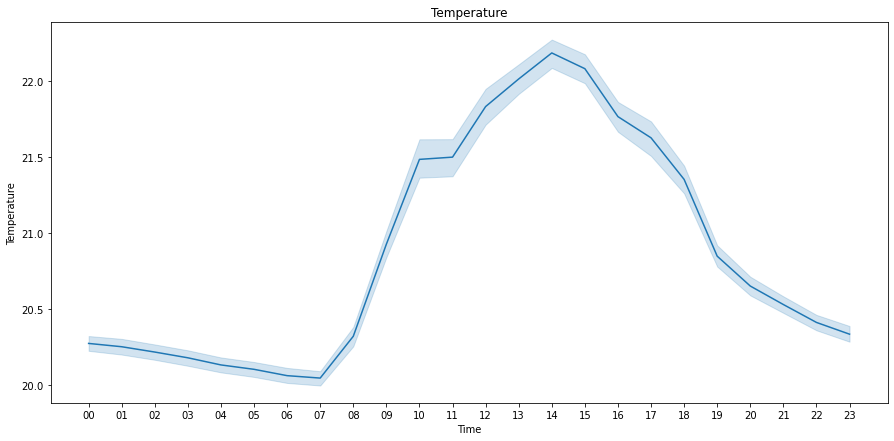

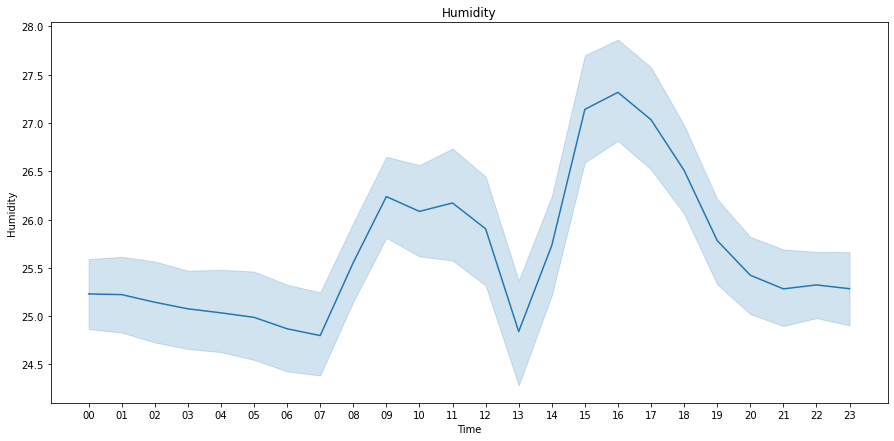

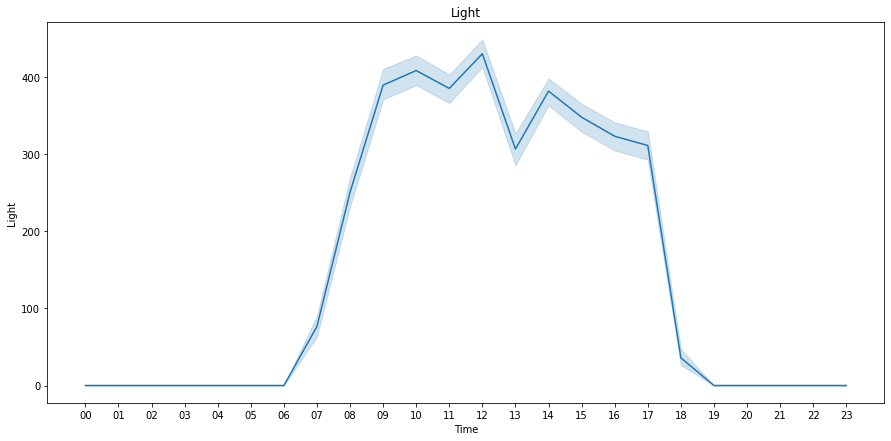

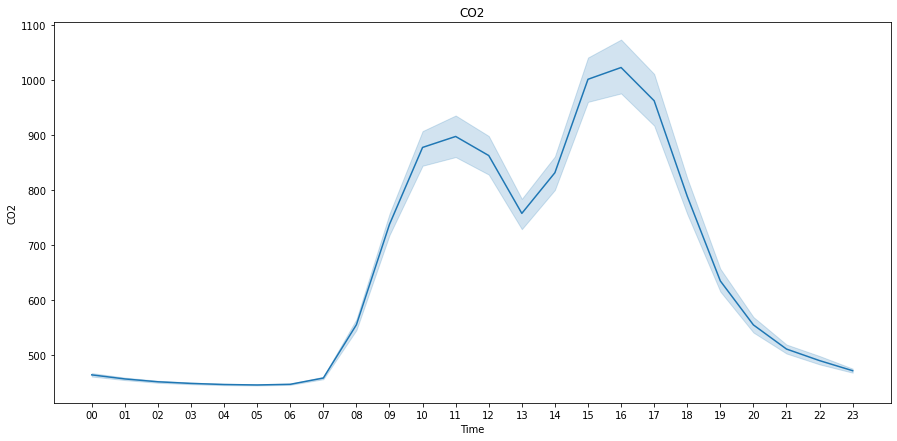

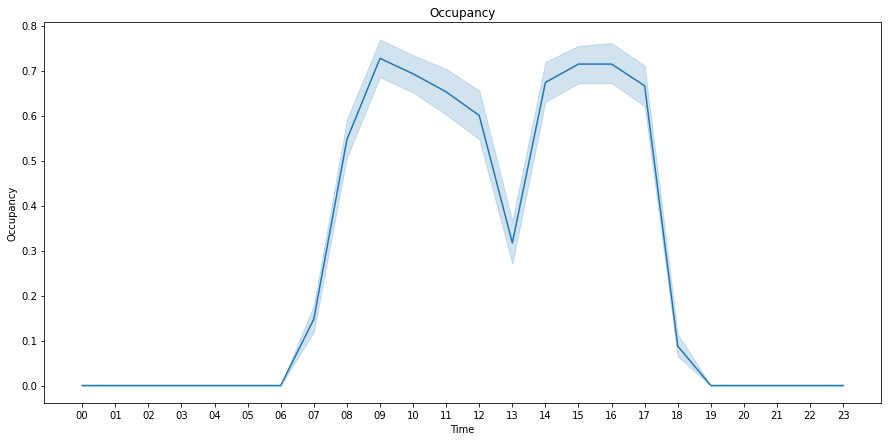

In [35]:
data_keys = ["Temperature","Humidity","Light","CO2","Occupancy"]

for keys_name in data_keys:
    plt.figure(figsize=(15,7))
    g = sns.lineplot(x ="Time", y=keys_name, data=df);
    plt.xlabel("Time")
    plt.ylabel(keys_name)
    plt.title(keys_name)
    plt.show()

##  <a id='12'> 3.7. Describe </a>

In [36]:
df.describe().T

count        mean         std         min         25%  \
Temperature    10808.0   20.819992    1.078410   19.000000   20.000000   
Humidity       10808.0   25.638407    4.953792   16.745000   21.390000   
Light          10808.0  137.694088  212.175483    0.000000    0.000000   
CO2            10808.0  634.005070  312.817270  412.750000  441.000000   
HumidityRatio  10808.0    0.003903    0.000803    0.002674    0.003323   
Occupancy      10808.0    0.249907    0.432979    0.000000    0.000000   

                      50%         75%          max  
Temperature     20.700000   21.500000    24.408333  
Humidity        25.680000   28.324167    39.117500  
Light            0.000000  413.541667  1697.250000  
CO2            464.000000  761.000000  2028.500000  
HumidityRatio    0.003805    0.004372     0.006476  
Occupancy        0.000000    0.000000     1.000000

## <a id='13'> 3.8.Correlation matrix </a>

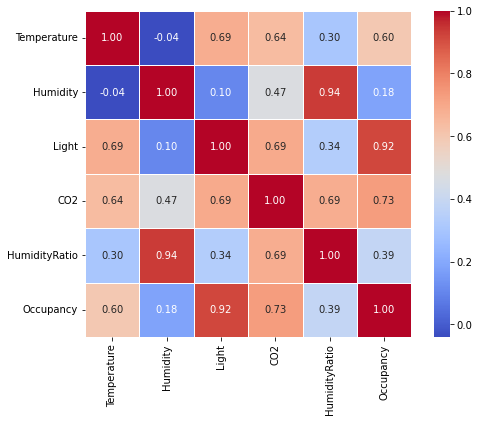

In [37]:
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True, square=True);

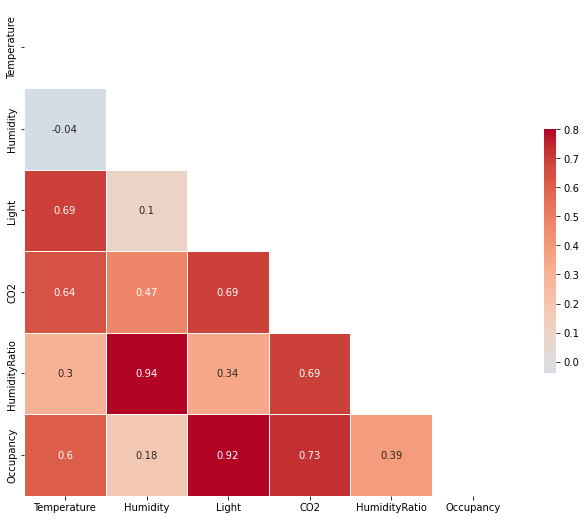

In [38]:
# Correlation matrix
corr = df.corr().round(2)

# Upper tirangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Figure
fig, ax = plt.subplots(figsize=(11,9))

# Heatmap
sns.heatmap(corr, mask=mask, annot=True,  cmap='coolwarm', vmax=.8, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5});

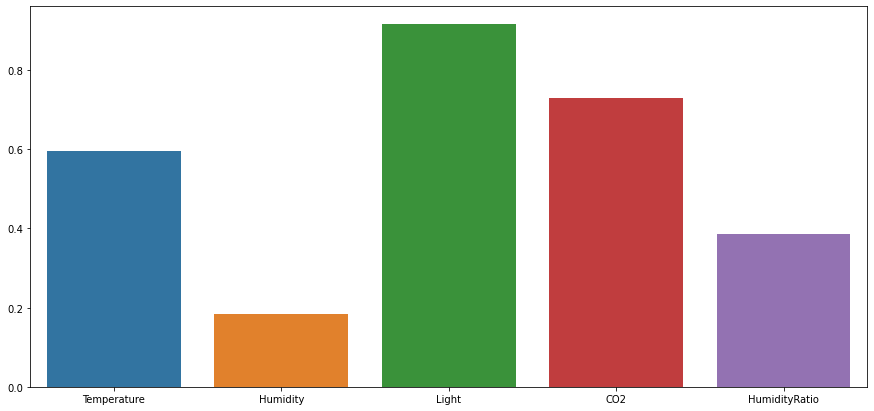

In [39]:
# Occupancy 
df_Occupancy = df.corrwith(df["Occupancy"]).drop("Occupancy")
plt.figure(figsize=(15,7))
g = sns.barplot(x=df_Occupancy.index, y=df_Occupancy.values);
g.set_xticklabels(g.get_xticklabels());

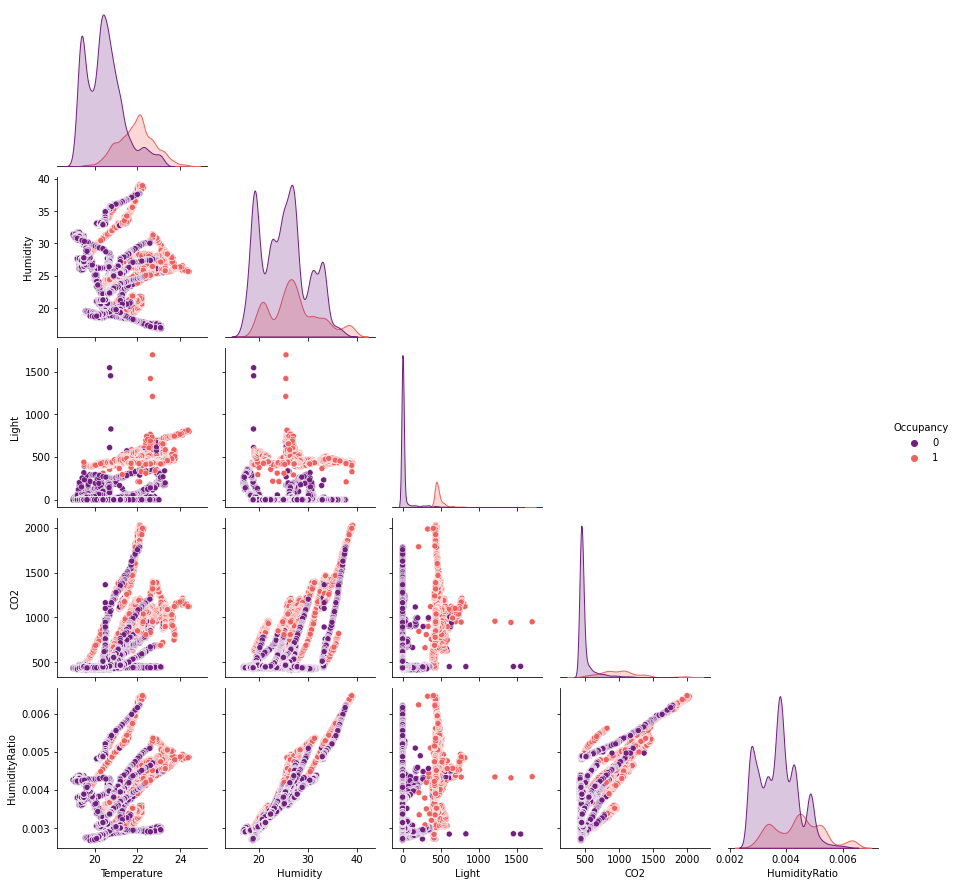

In [40]:
#Pair plot 
sns.pairplot(df, hue="Occupancy",diag_kind = "kde",corner=True, palette="magma");

## <a id='14'> 4. Model Random Forest </a>

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [42]:
df=df.reset_index()
df.drop(['index'],inplace=True,axis=1)

## Train data

In [43]:
features = ["Temperature", "Humidity", "Light", "CO2","HumidityRatio"]

X = df[features]
y = df["Occupancy"] 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


## Test data

In [44]:
dataset_3 = pd.read_csv('Veriseti3.txt')
dataset_Test = dataset_3.copy()

features = ["Temperature", "Humidity", "Light", "CO2","HumidityRatio"]
X_Test_real = dataset_Test[features]
Y_Test_real = dataset_Test["Occupancy"] 

## Rf Model

In [45]:
# Model
rf = RandomForestClassifier().fit(X=X_train, y=y_train)

# Test
y_predicted = rf.predict(X=X_test)
accuracy_score(y_true=y_test, y_pred=y_predicted)


0.9907493061979649

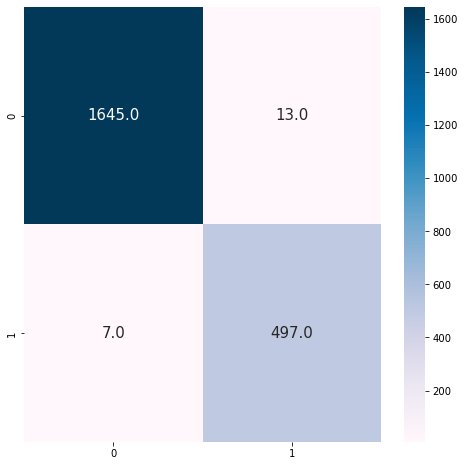

In [46]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_predicted)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, annot_kws = {'size':15},fmt=".1f" ,cmap = 'PuBu');

In [47]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1658
           1       0.97      0.99      0.98       504

    accuracy                           0.99      2162
   macro avg       0.99      0.99      0.99      2162
weighted avg       0.99      0.99      0.99      2162



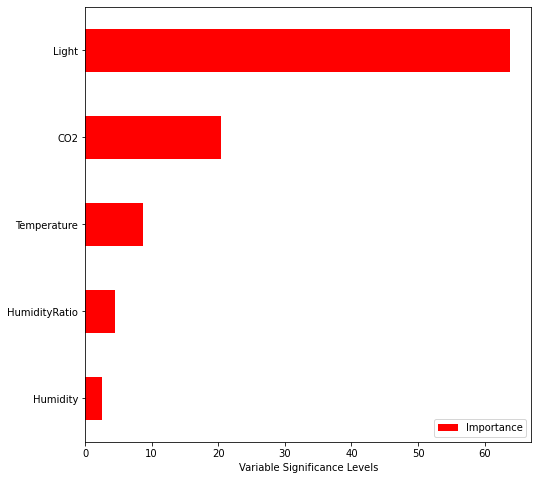

In [48]:
Importance = pd.DataFrame({"Importance": rf.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Significance Levels");


## Test Model 

In [49]:
y_predicted = rf.predict(X=X_Test_real)
accuracy_score(y_true=Y_Test_real, y_pred=y_predicted)

0.9906685808039376

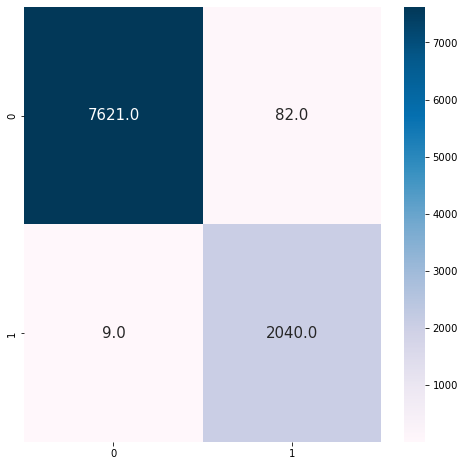

In [50]:
# Cofusion Matrix
cm = confusion_matrix(Y_Test_real, y_predicted)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, annot_kws = {'size':15},fmt=".1f" ,cmap = 'PuBu');

In [51]:
print(classification_report(Y_Test_real, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7703
           1       0.96      1.00      0.98      2049

    accuracy                           0.99      9752
   macro avg       0.98      0.99      0.99      9752
weighted avg       0.99      0.99      0.99      9752



## <a id='15'> 5. Model Gradient Boosting </a>

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X=X_train, y=y_train)


y_predicted = gbc.predict(X=X_test)
accuracy_score(y_true=y_test, y_pred=y_predicted)

0.9893617021276596

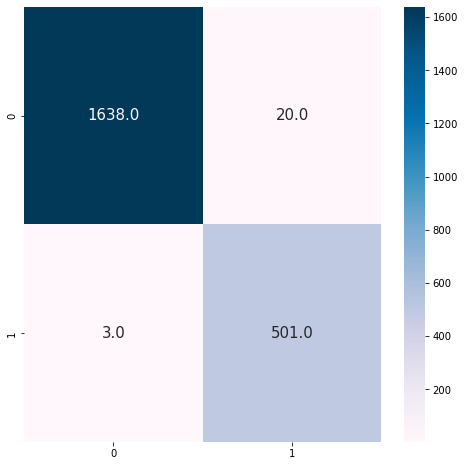

In [53]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_predicted)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, annot_kws = {'size':15},fmt=".1f" ,cmap = 'PuBu');

In [54]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1658
           1       0.96      0.99      0.98       504

    accuracy                           0.99      2162
   macro avg       0.98      0.99      0.99      2162
weighted avg       0.99      0.99      0.99      2162



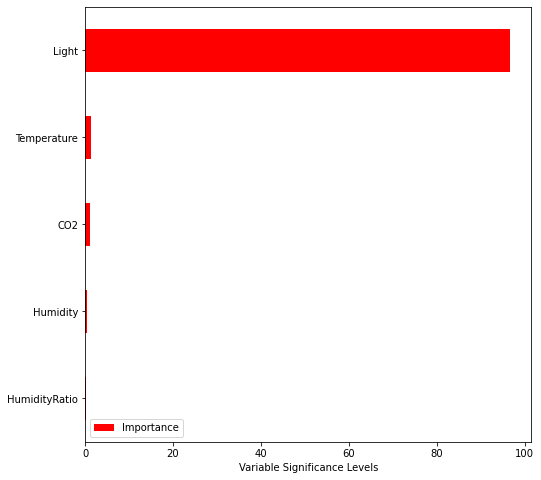

In [55]:
Importance = pd.DataFrame({"Importance": gbc.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Significance Levels");

## Test Model

In [56]:
y_predicted = gbc.predict(X=X_Test_real)
accuracy_score(y_true=Y_Test_real, y_pred=y_predicted)

0.9886177194421657

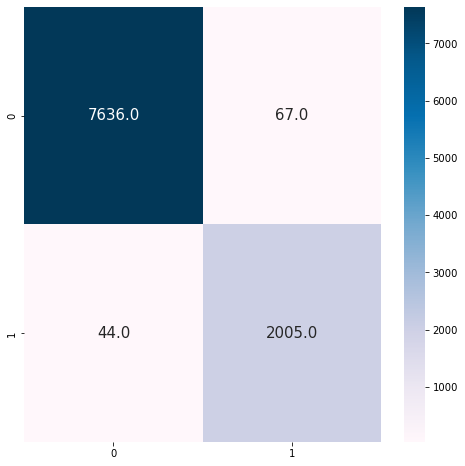

In [57]:
# Cofusion Matrix
cm = confusion_matrix(Y_Test_real, y_predicted)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, annot_kws = {'size':15},fmt=".1f" ,cmap = 'PuBu');

In [58]:
print(classification_report(Y_Test_real, y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.97      0.98      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.98      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752



## Model Comparison 

In [59]:
models = [
    rf,
    gbc              
]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
RandomForestClassifier:
Accuracy: 99.0749%
----------------------------
GradientBoostingClassifier:
Accuracy: 98.9362%


## <a id='16'> 6. Feature Engineering  </a>

In [60]:
df["New_Param"]=((df["Humidity"]*df["CO2"])+df["Light"])/df["Temperature"]

In [61]:
df.head()

date  Temperature  Humidity  Light     CO2  HumidityRatio  \
0 2015-02-03 00:07:00         20.6    22.200    0.0  444.75       0.003325   
1 2015-02-07 00:15:00         20.0    18.745    0.0  435.00       0.002703   
2 2015-02-07 00:14:00         20.0    18.700    0.0  434.00       0.002696   
3 2015-02-07 00:13:00         20.0    18.790    0.0  441.00       0.002709   
4 2015-02-07 00:11:59         20.0    18.790    0.0  438.00       0.002709   

   Occupancy Time   New_Param  
0          0   00  479.293689  
1          0   00  407.703750  
2          0   00  405.790000  
3          0   00  414.319500  
4          0   00  411.501000

## Train Data

In [62]:
features = ["Temperature", "Humidity", "Light", "CO2","HumidityRatio","New_Param"]

X = df[features]
y = df["Occupancy"] 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


## Test Data

In [63]:
dataset_3 = pd.read_csv('Veriseti3.txt')
dataset_Test_FE = dataset_3.copy()
dataset_Test_FE["New_Param"]=((dataset_Test_FE["Humidity"]*dataset_Test_FE["CO2"])+dataset_Test_FE["Light"])/dataset_Test_FE["Temperature"]

features = ["Temperature", "Humidity", "Light", "CO2","HumidityRatio","New_Param"]
X_Test_Real_FE = dataset_Test_FE[features]
Y_Test_Real_FE = dataset_Test_FE["Occupancy"] 

<AxesSubplot:xlabel='New_Param', ylabel='Count'>

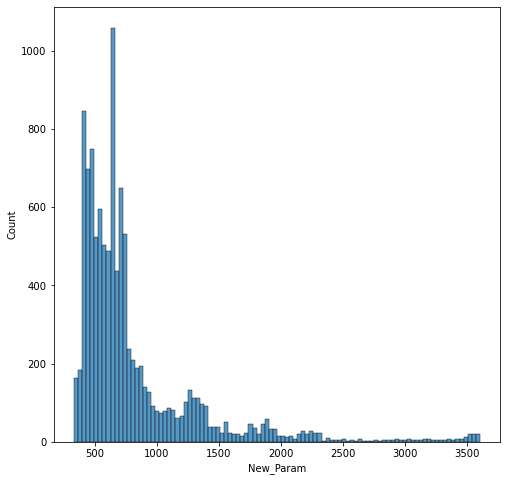

In [64]:
sns.histplot(data=df, x="New_Param")

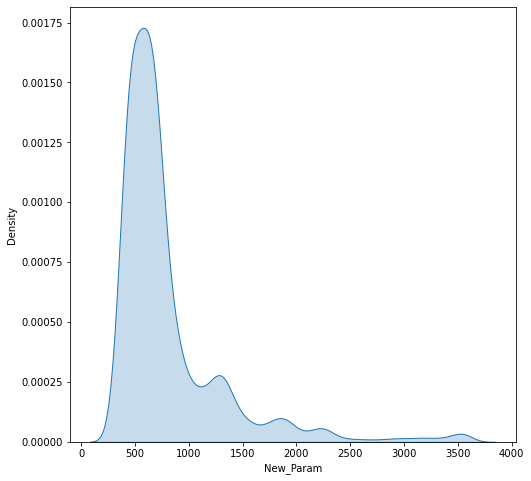

In [65]:
sns.kdeplot(data=df, x="New_Param",shade=True);

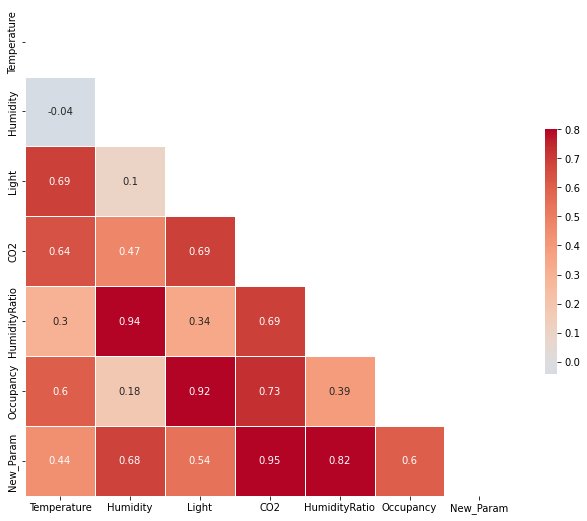

In [66]:
# Correlation matrix
corr = df.corr().round(2)

# Upper tirangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Figure
fig, ax = plt.subplots(figsize=(11,9))

# Heatmap
sns.heatmap(corr, mask=mask, annot=True,  cmap='coolwarm', vmax=.8, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5});

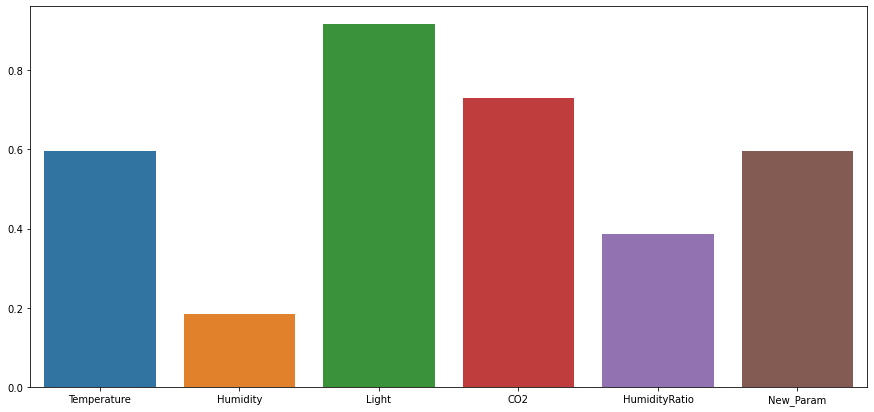

In [67]:
# Occupancy 
df_Occupancy = df.corrwith(df["Occupancy"]).drop("Occupancy")
plt.figure(figsize=(15,7))
g = sns.barplot(x=df_Occupancy.index, y=df_Occupancy.values);
g.set_xticklabels(g.get_xticklabels());

## <a id='17'> 7. Random Forest  Model Tuning  </a>

In [68]:
from sklearn.model_selection import GridSearchCV

rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,50,100],
             "max_samples": [.5, .7, 1],
            "min_samples_split": [2,5,10]}

rf_model = RandomForestClassifier()


rf_cv = GridSearchCV(rf_model, 
                           rf_params,
                           scoring="accuracy",
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 1) 
rf_cv_model=rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [69]:
rf_cv_model.best_score_

0.9909784465610446

In [70]:
print("Best params: " + str(rf_cv_model.best_params_))

Best params: {'max_depth': 10, 'max_features': 5, 'max_samples': 0.7, 'min_samples_split': 2, 'n_estimators': 100}


In [71]:
y_predicted = rf_cv_model.predict(X=X_test)
accuracy_score(y_test, y_predicted)

0.9916743755781684

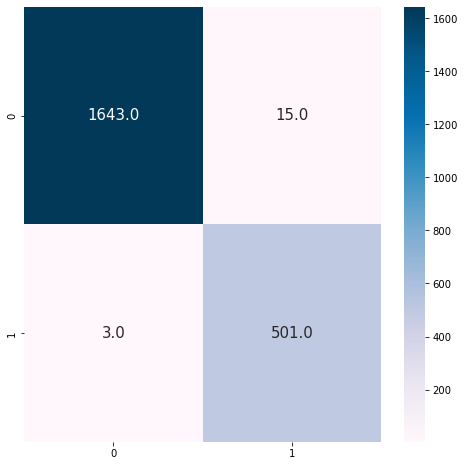

In [72]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_predicted)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, annot_kws = {'size':15},fmt=".1f" ,cmap = 'PuBu');

In [73]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1658
           1       0.97      0.99      0.98       504

    accuracy                           0.99      2162
   macro avg       0.98      0.99      0.99      2162
weighted avg       0.99      0.99      0.99      2162



## Test model

In [74]:
y_predicted = rf_cv_model.predict(X=X_Test_Real_FE)
accuracy_score(y_true=Y_Test_Real_FE, y_pred=y_predicted)

0.9882075471698113

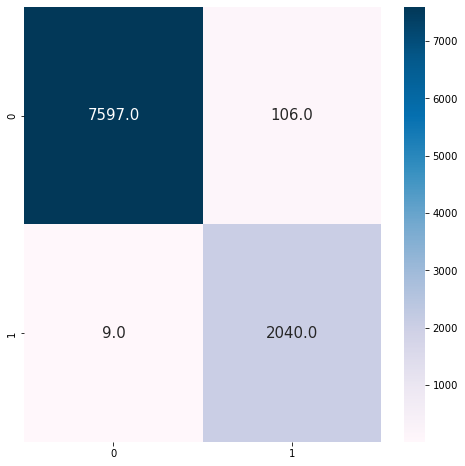

In [75]:
# Cofusion Matrix
cm = confusion_matrix(Y_Test_Real_FE, y_predicted)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, annot_kws = {'size':15},fmt=".1f" ,cmap = 'PuBu');

In [76]:
print(classification_report(Y_Test_Real_FE, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7703
           1       0.95      1.00      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.99      0.98      9752
weighted avg       0.99      0.99      0.99      9752



## <a id='18'> 8. Gradient Boosting  Model Tuning  </a>

In [77]:
gbt = GradientBoostingClassifier()

params_gb = {"max_depth" : [3, 20],
             "max_features" : [.4, .8],
             "learning_rate" : [.001, 0.01, 0.05],
             "n_estimators" : [5, 10, 50]}


grid_gb = GridSearchCV(estimator=gbt, param_grid=params_gb, scoring="accuracy", cv=5, verbose=1)

grid_gb.fit(X=X_train, y=y_train)

gb_cv_model=grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [78]:
gb_cv_model.best_score_

0.9923664652961884

In [79]:
print("Best params: " + str(gb_cv_model.best_params_))

Best params: {'learning_rate': 0.05, 'max_depth': 20, 'max_features': 0.4, 'n_estimators': 50}


In [80]:
y_predicted = gb_cv_model.predict(X=X_test)
accuracy_score(y_test, y_predicted)

0.9912118408880666

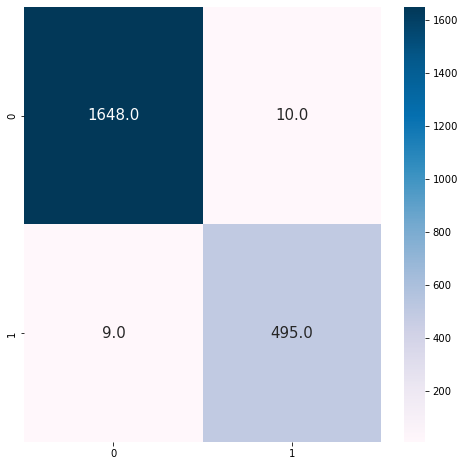

In [81]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_predicted)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, annot_kws = {'size':15},fmt=".1f" ,cmap = 'PuBu');

In [82]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1658
           1       0.98      0.98      0.98       504

    accuracy                           0.99      2162
   macro avg       0.99      0.99      0.99      2162
weighted avg       0.99      0.99      0.99      2162



## Test model

In [83]:
y_predicted = gb_cv_model.predict(X=X_Test_Real_FE)
accuracy_score(y_true=Y_Test_Real_FE, y_pred=y_predicted)

0.9837981952420016

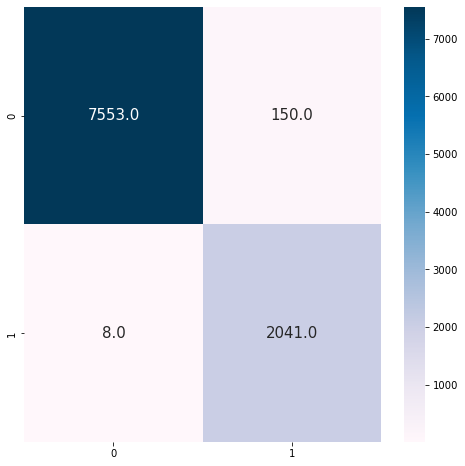

In [84]:
# Cofusion Matrix
cm = confusion_matrix(Y_Test_Real_FE, y_predicted)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, annot_kws = {'size':15},fmt=".1f" ,cmap = 'PuBu');

In [85]:
print(classification_report(Y_Test_Real_FE, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7703
           1       0.93      1.00      0.96      2049

    accuracy                           0.98      9752
   macro avg       0.97      0.99      0.98      9752
weighted avg       0.98      0.98      0.98      9752



## Model Comparison 

In [86]:
models = [
    rf_cv_model,
    gb_cv_model              
]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
GridSearchCV:
Accuracy: 99.1674%
----------------------------
GridSearchCV:
Accuracy: 99.1212%
